In [2]:
# import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [3]:
data = pd.read_csv("Dataset.csv")


In [32]:
data.shape

(1181, 20)

In [33]:
data.describe()

,ID,coinNum,teamSize,overallrating,ratingTeam,ratingProduct,whitepaper,video,socialMedia,GitHub,CEOPhoto
count,1181.000000,1.181000e+03,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.00000,1181.000000
mean,591.000000,2.318979e+13,11.878916,2.916257,2.252498,2.068163,0.958510,0.690093,0.617273,0.49873,0.341236
std,341.069641,6.720056e+14,7.553183,0.784688,1.809088,1.682050,0.199506,0.462651,1.119552,0.50021,0.474325
min,1.000000,0.000000e+00,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,296.000000,8.000000e+06,6.000000,2.300000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,591.000000,6.000000e+07,10.000000,2.900000,2.900000,2.400000,1.000000,1.000000,0.000000,0.00000,0.000000
75%,886.000000,2.800000e+08,16.000000,3.500000,4.000000,3.600000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1181.000000,2.260000e+16,67.000000,4.800000,5.000000,5.000000,1.000000,1.000000,3.000000,1.00000,1.000000


In [34]:
data.head()

,ID,goal,enddate,startdate,coinNum,teamSize,country_region,categories,overallrating,ratingTeam,ratingProduct,platform,acceptingCurrencyNum,whitepaper,video,socialMedia,GitHub,teamLinkedIn,teamPhotos,CEOPhoto
0,1,N,15-04-2018,01-03-2018,1.275000e+07,14,Estonia,"Charity,Education,Health,Smart Contract",2.6,2.4,2.4,Ethereum,1,1,1,0,0,86%,100%,0
1,2,N,25-08-2017,25-07-2017,0.000000e+00,13,Singapore,Infrastructure,2.1,0.0,0.0,unknown,1,1,1,0,1,0%,100%,0
2,3,Y,23-11-2017,18-11-2017,2.220000e+09,9,Singapore,"Platform,Business services",2.5,0.0,0.0,Ethereum,unknown,1,0,3,0,0%,100%,0
3,4,Y,18-05-2018,22-04-2018,4.500000e+07,7,Mexico,"Internet,Infrastructure,Cryptocurrency,Busines...",2.1,1.0,2.0,Ethereum,2,1,0,0,0,0%,100%,1
4,5,Y,02-02-2018,01-02-2018,8.000000e+07,20,Gibraltar,"Platform,Infrastructure,Energy",4.3,4.4,4.0,Ethereum,1,1,1,2,1,100%,100%,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1181 non-null   int64  
 1   goal                  1181 non-null   object 
 2   enddate               1181 non-null   object 
 3   startdate             1181 non-null   object 
 4   coinNum               1181 non-null   float64
 5   teamSize              1181 non-null   int64  
 6   country_region        1181 non-null   object 
 7   categories            1181 non-null   object 
 8   overallrating         1181 non-null   float64
 9   ratingTeam            1181 non-null   float64
 10  ratingProduct         1181 non-null   float64
 11  platform              1181 non-null   object 
 12  acceptingCurrencyNum  1181 non-null   object 
 13  whitepaper            1181 non-null   int64  
 14  video                 1181 non-null   int64  
 15  socialMedia          

In [37]:
data.isnull().sum()

ID                      0
goal                    0
enddate                 0
startdate               0
coinNum                 0
teamSize                0
country_region          0
categories              0
overallrating           0
ratingTeam              0
ratingProduct           0
platform                0
acceptingCurrencyNum    0
whitepaper              0
video                   0
socialMedia             0
GitHub                  0
teamLinkedIn            0
teamPhotos              0
CEOPhoto                0
dtype: int64

# Data Understanding and cleaning

In [4]:
data['startdate'] = pd.to_datetime(data['startdate'])
data['enddate'] = pd.to_datetime(data['enddate'])

In [5]:
data['acceptingCurrencyNum'].unique()

array(['1', 'unknown', '2', '3', '4', '10', '7', '5', '8', '6', '9', '11'],
      dtype=object)

In [15]:
data['acceptingCurrencyNum'].loc[data['acceptingCurrencyNum'] == 'unknown'] = '0'

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
data['acceptingCurrencyNum'] = data['acceptingCurrencyNum'].astype(int)

# Univariate analysis

<AxesSubplot:>

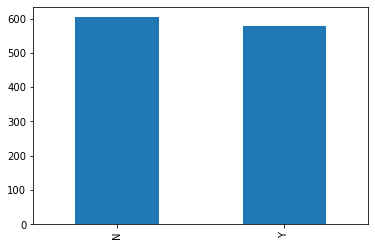

In [8]:
data['goal'].value_counts().plot.bar()

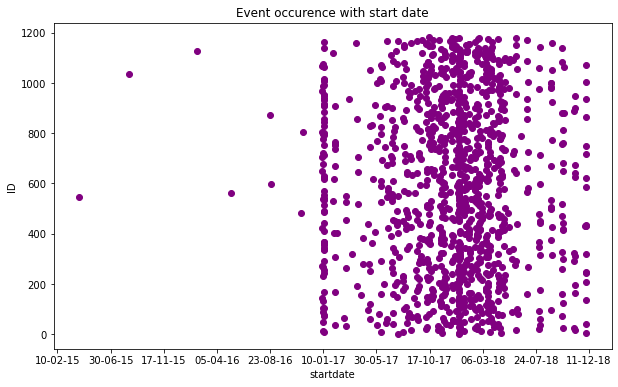

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data['startdate'],
       data.ID,
       color='purple')

ax.set(xlabel="startdate",
       ylabel="ID",
       title="Event occurence with start date")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))

plt.show()

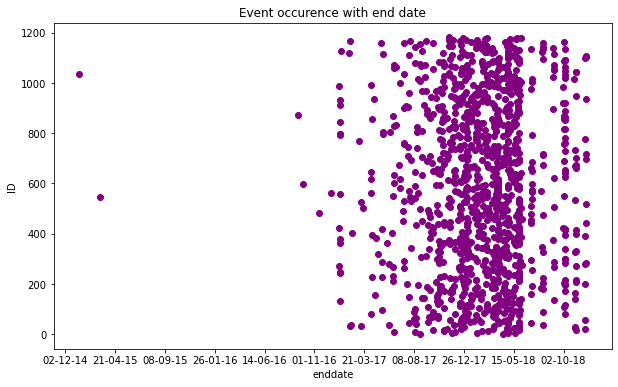

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data['enddate'],
       data.ID,
       color='purple')

ax.set(xlabel="enddate",
       ylabel="ID",
       title="Event occurence with end date")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))

plt.show()

In [11]:
data['startToend'] = data['enddate']-data['startdate']

In [12]:
data['startToend'] = data['startToend'].astype('timedelta64[D]').astype(int)
data['startToend'].describe()

count    1181.000000
mean       59.610500
std       119.740598
min      -333.000000
25%         6.000000
50%        31.000000
75%        91.000000
max       659.000000
Name: startToend, dtype: float64

In [13]:
data['startToend'].loc[data['startToend'] < 0].count()

166

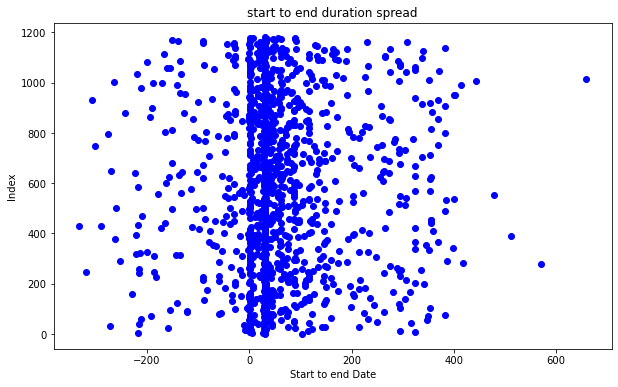

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data['startToend'],
       data.index.values,
       color='blue')

ax.set(xlabel="Start to end Date",
       ylabel="Index",
       title="start to end duration spread")

#date_form = DateFormatter("%d-%m-%y")
#ax.xaxis.set_major_formatter(date_form)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))

plt.show()

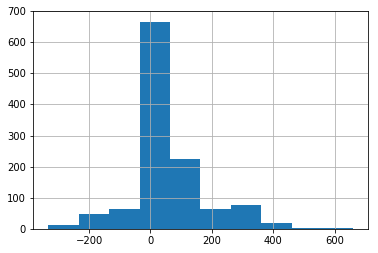

In [19]:
data['startToend'].hist()

In [20]:
data['startToend'].loc[(data['goal'] == 'Y') & (data['startToend'] < 0)].count()

80

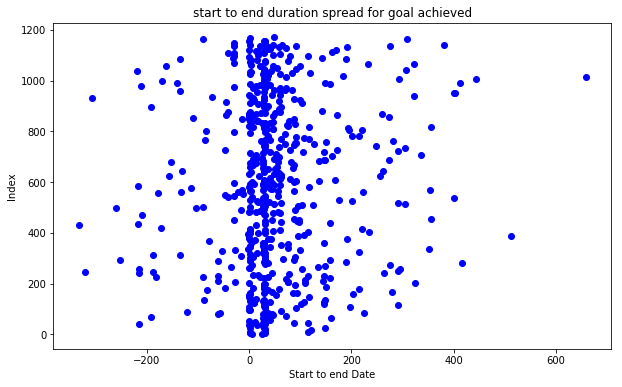

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data['startToend'].loc[data['goal'] == 'Y'],
       data.loc[data['goal'] == 'Y'].index.values,
       color='blue')

ax.set(xlabel="Start to end Date",
       ylabel="Index",
       title="start to end duration spread for goal achieved")

#date_form = DateFormatter("%d-%m-%y")
#ax.xaxis.set_major_formatter(date_form)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))

plt.show()

In [22]:
data['coinNum'].describe()

count    1.181000e+03
mean     2.318979e+13
std      6.720056e+14
min      0.000000e+00
25%      8.000000e+06
50%      6.000000e+07
75%      2.800000e+08
max      2.260000e+16
Name: coinNum, dtype: float64

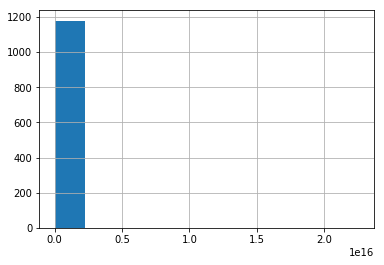

In [23]:
data['coinNum'].hist()

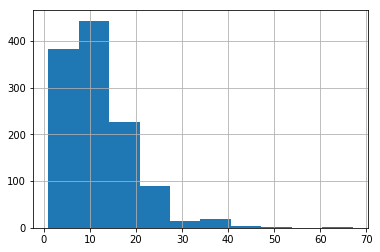

In [24]:
data['teamSize'].hist()

In [25]:
data['country_region'].describe()

count     1181
unique     103
top        USA
freq       175
Name: country_region, dtype: object

In [26]:
data['country_region'].value_counts().head(5)

USA            175
Russia         131
UK             113
Singapore       99
Switzerland     60
Name: country_region, dtype: int64

In [27]:
data['categories'].describe()

count               1181
unique               557
top       Cryptocurrency
freq                  64
Name: categories, dtype: object

In [28]:
data['platform'].value_counts().head(5)

Ethereum    979
unknown      85
Waves        44
NEO           6
NEM           6
Name: platform, dtype: int64

In [29]:
data['overallrating'].describe()

count    1181.000000
mean        2.916257
std         0.784688
min         0.800000
25%         2.300000
50%         2.900000
75%         3.500000
max         4.800000
Name: overallrating, dtype: float64

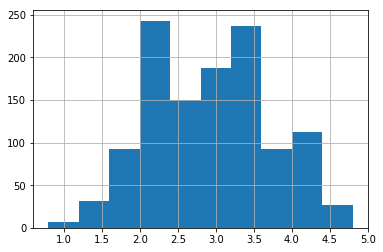

In [30]:
data['overallrating'].hist()

In [31]:
data['ratingTeam'].describe()

count    1181.000000
mean        2.252498
std         1.809088
min         0.000000
25%         0.000000
50%         2.900000
75%         4.000000
max         5.000000
Name: ratingTeam, dtype: float64

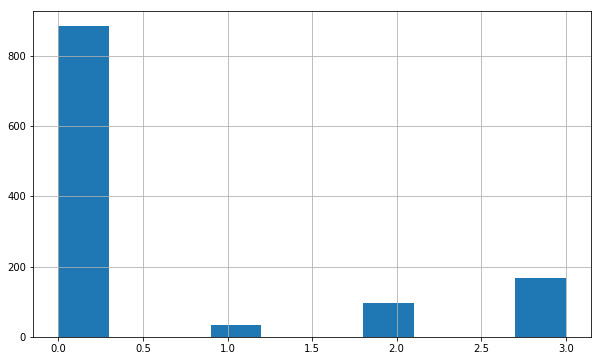

In [32]:
plt.rcParams["figure.figsize"] = (10,6)
data['socialMedia'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D878208>,
      dtype=object)

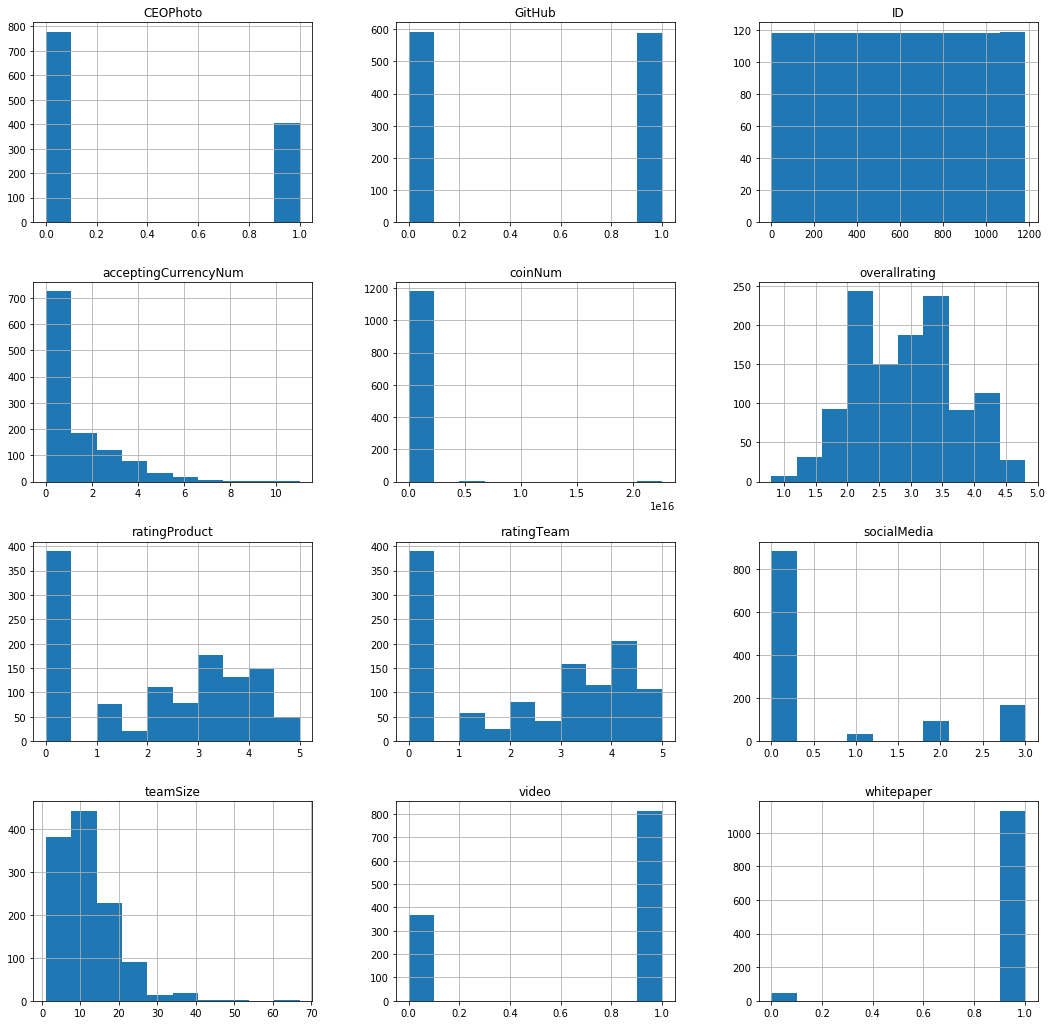

In [33]:
plt.rcParams["figure.figsize"] = (18,18)
#data.hist()
data.loc[ : , data.columns != 'startToend'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecatio

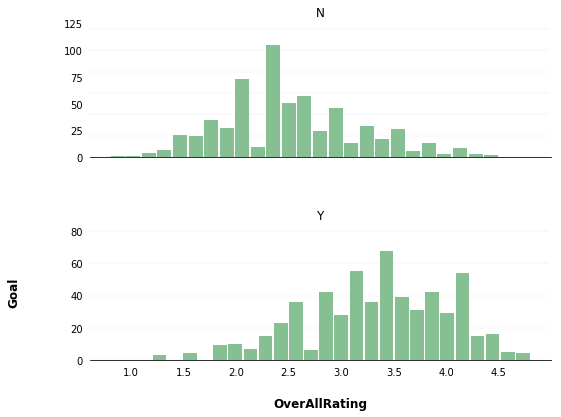

In [34]:
ax = data.hist(column='overallrating', by='goal', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("OverAllRating", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Goal", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

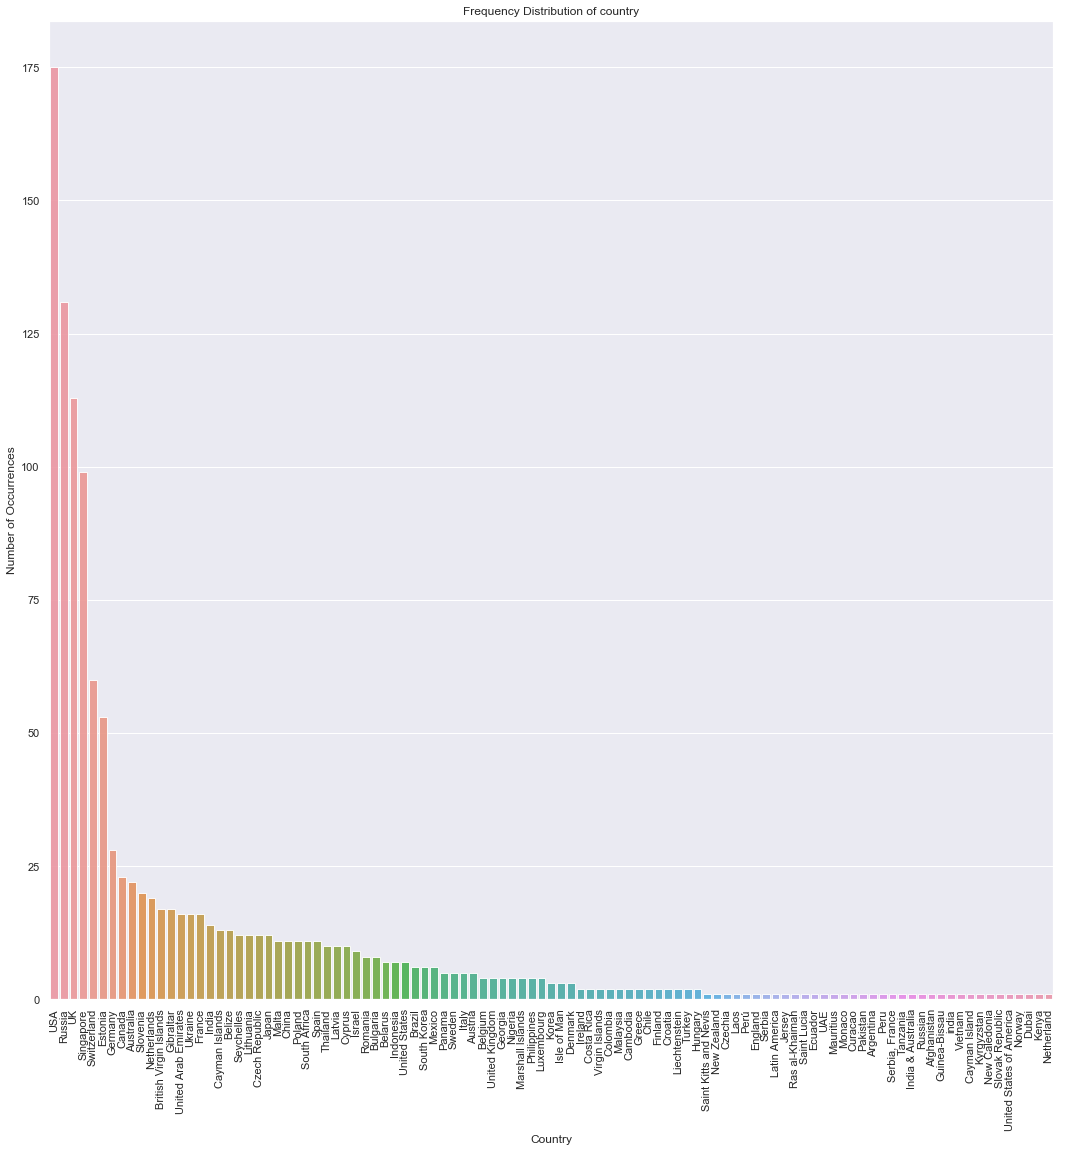

In [35]:
country_counts = data['country_region'].value_counts()
sns.set(style="darkgrid")
sns.barplot(country_counts.index, country_counts.values, alpha=0.9)
plt.title('Frequency Distribution of country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

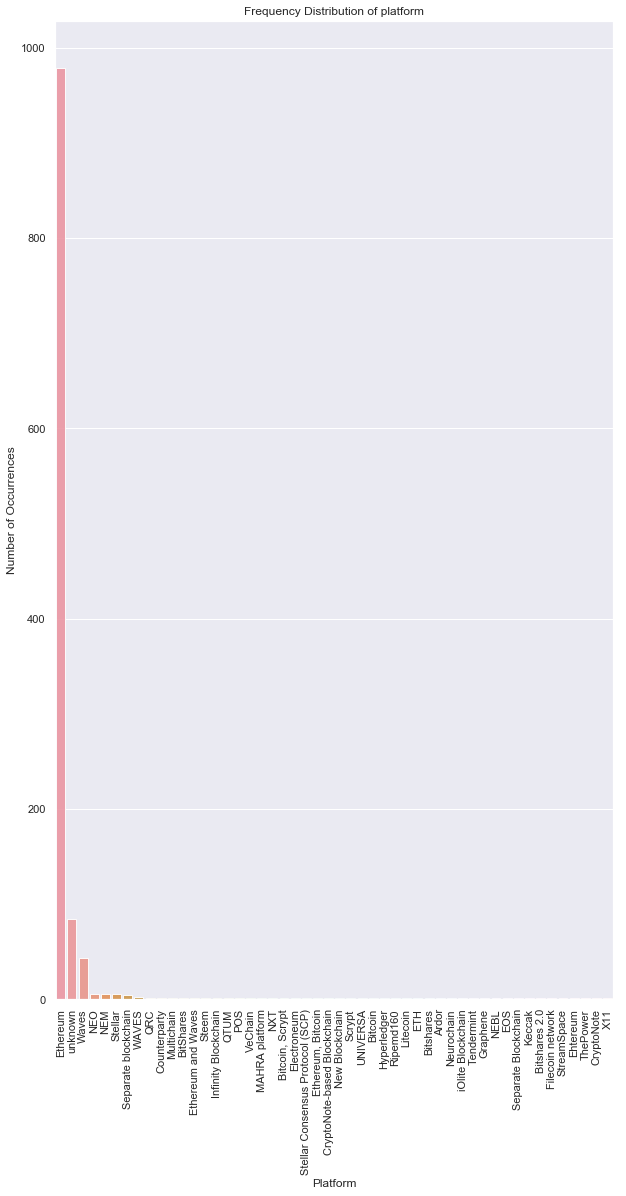

In [36]:
plt.rcParams["figure.figsize"] = (10,18)
platform_counts = data['platform'].value_counts()
sns.set(style="darkgrid")
sns.barplot(platform_counts.index, platform_counts.values, alpha=0.9)
plt.title('Frequency Distribution of platform')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [37]:
label_encoder = preprocessing.LabelEncoder()
data['platform']= label_encoder.fit_transform(data['platform'])
data['country_region'] = label_encoder.fit_transform(data['country_region'])
data['categories'] = label_encoder.fit_transform(data['categories'])
data['goal'] = label_encoder.fit_transform(data['goal'])

In [38]:
data['platform'].describe()

count    1181.000000
mean       17.601185
std        11.541567
min         0.000000
25%        13.000000
50%        13.000000
75%        13.000000
max        49.000000
Name: platform, dtype: float64

In [39]:
data['teamLinkedIn'] = data['teamLinkedIn'].str.rstrip("%").astype(float)/100
data['teamPhotos'] = data['teamPhotos'].str.rstrip("%").astype(float)/100

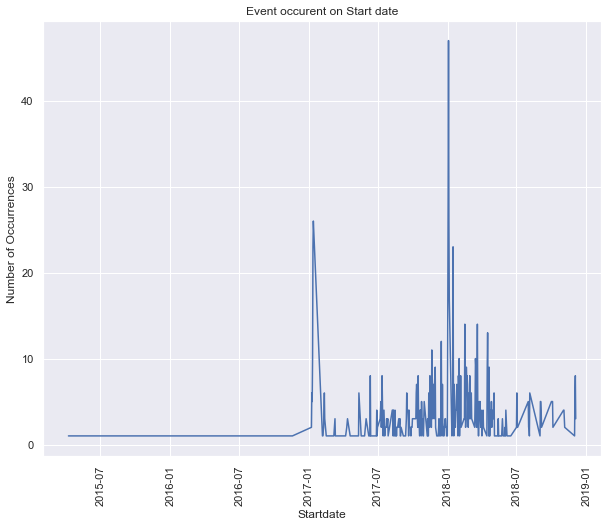

In [40]:
plt.rcParams["figure.figsize"] = (10,8)
startdate_counts = data['startdate'].value_counts()
startdate_df = pd.DataFrame(startdate_counts)
startdate_df['date'] = startdate_df.index
sns.set(style="darkgrid")
sns.lineplot(x='date', y='startdate',data=startdate_df)
plt.title('Event occurent on Start date')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Startdate', fontsize=12)
plt.xticks(rotation=90)
plt.show()

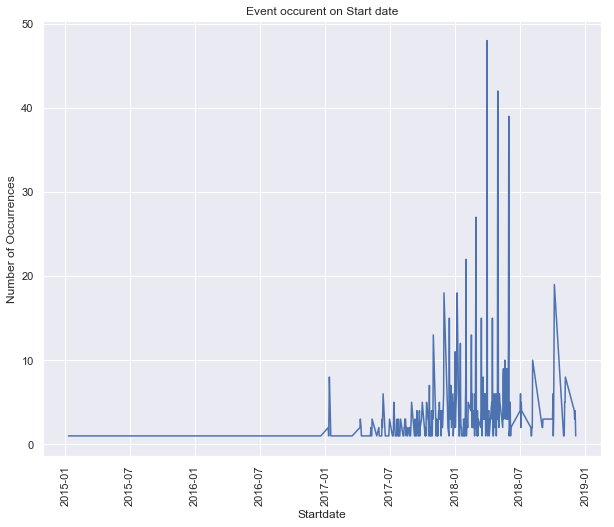

In [41]:
enddate_counts = data['enddate'].value_counts()
enddate_df = pd.DataFrame(enddate_counts)
enddate_df['date'] = enddate_df.index
sns.set(style="darkgrid")
sns.lineplot(x='date', y='enddate',data=enddate_df)
plt.title('Event occurent on Start date')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Startdate', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [42]:
data['startdate_day'] = pd.DatetimeIndex(data['startdate']).day
data['startdate_month'] = pd.DatetimeIndex(data['startdate']).month
data['startdate_year'] = pd.DatetimeIndex(data['startdate']).year

In [43]:
data['enddate_day'] = pd.DatetimeIndex(data['enddate']).day
data['enddate_month'] = pd.DatetimeIndex(data['enddate']).month
data['enddate_year'] = pd.DatetimeIndex(data['enddate']).year

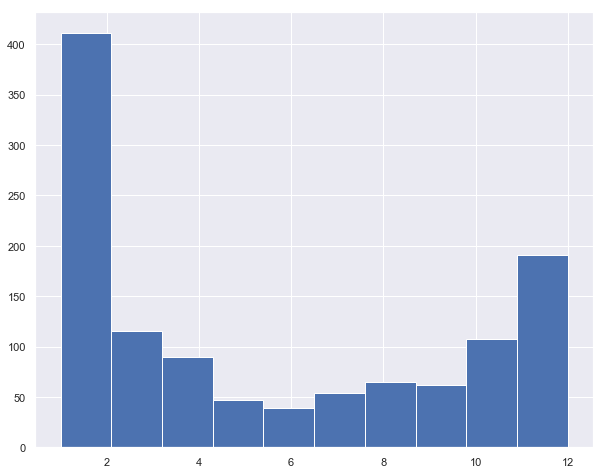

In [44]:
data['startdate_month'].hist()
plt.show()

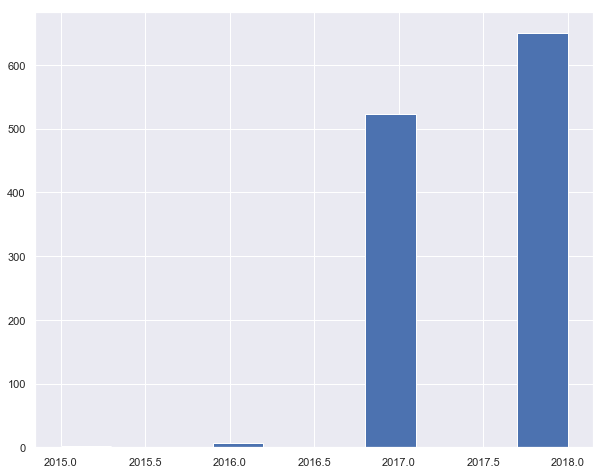

In [45]:
data['startdate_year'].hist()
plt.show()

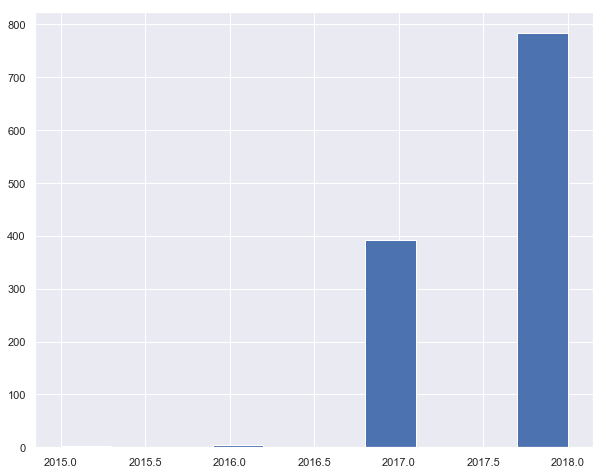

In [46]:
data['enddate_year'].hist()
plt.show()

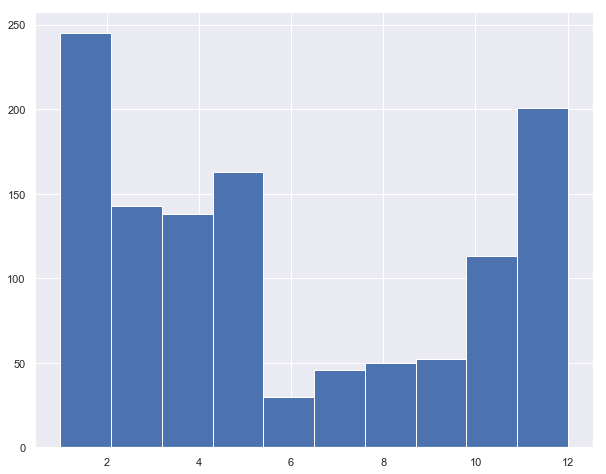

In [47]:
data['enddate_month'].hist()
plt.show()

In [48]:
sns.boxplot(data_v1['coinNum'])
plt.show()

NameError: name 'data_v1' is not defined

In [49]:
sns.boxplot(data_v1['teamSize'])
plt.show()

NameError: name 'data_v1' is not defined

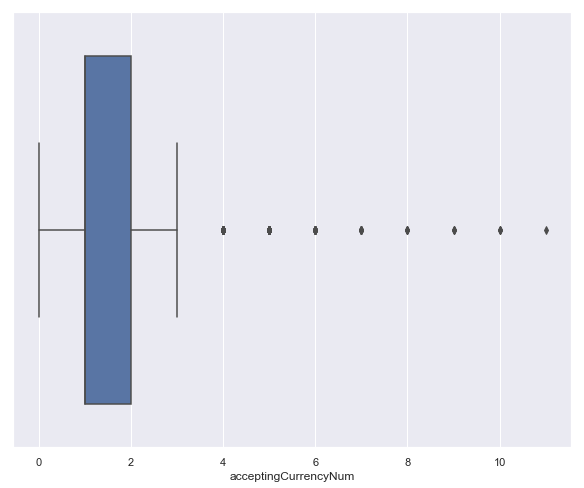

In [50]:
sns.boxplot(data['acceptingCurrencyNum'])
plt.show()

In [51]:
sns.boxplot(data_v1['whitepaper'])
plt.show()

NameError: name 'data_v1' is not defined

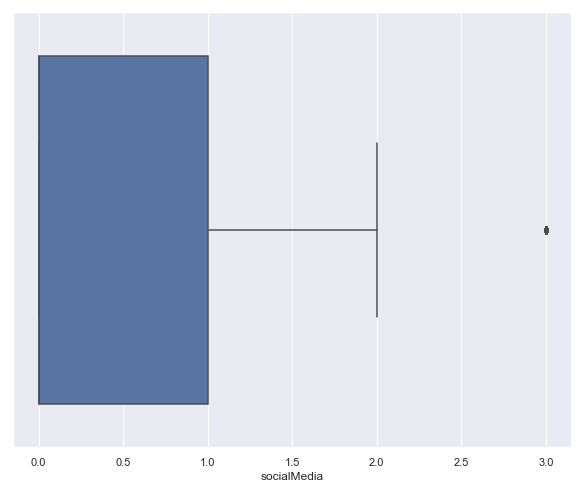

In [52]:
sns.boxplot(data['socialMedia'])
plt.show()

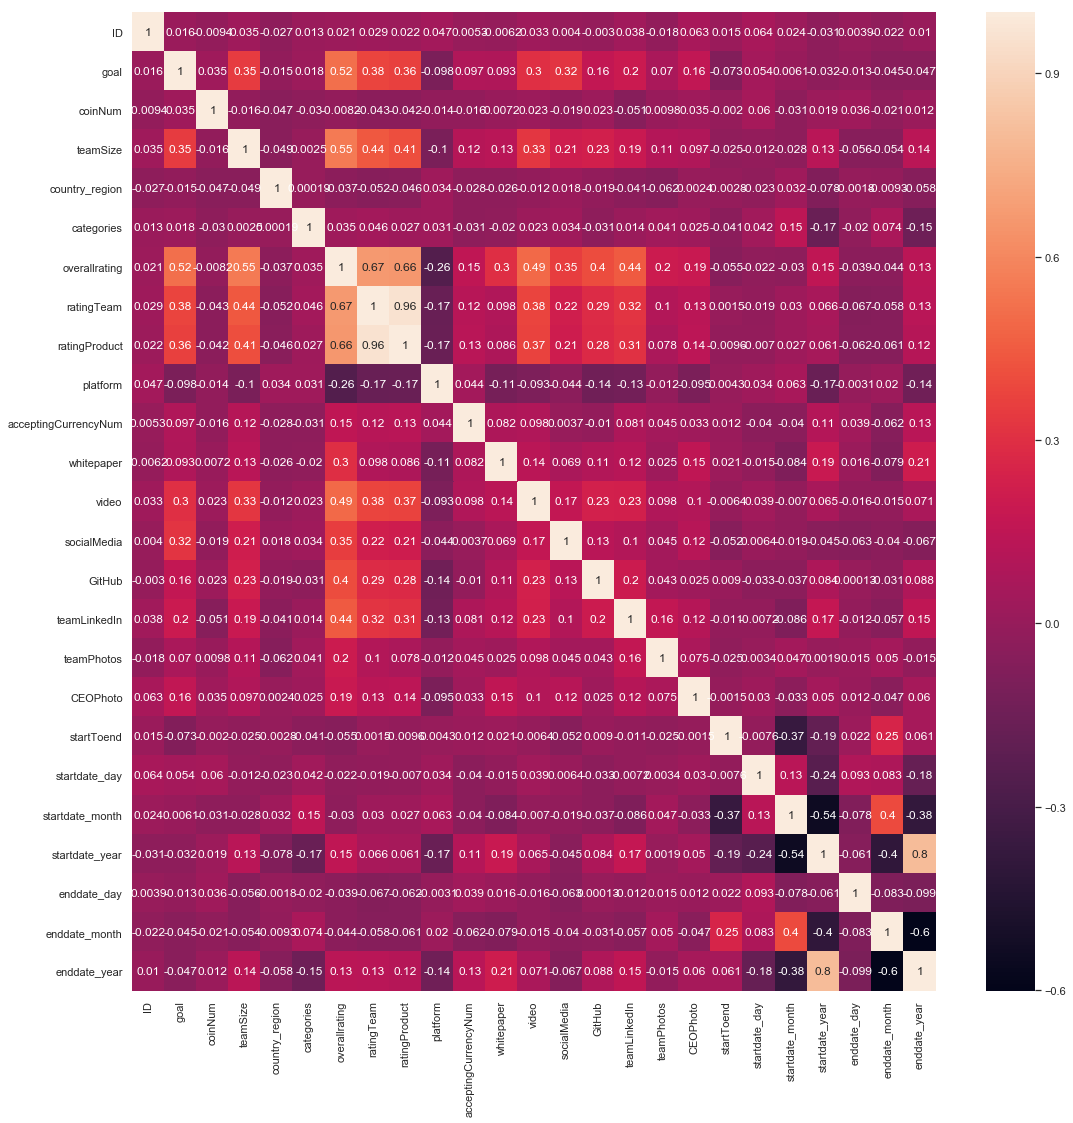

In [53]:
plt.rcParams["figure.figsize"] = (18,18)
sns.heatmap(data.corr(), annot = True)
plt.show()

In [54]:
data_v1 = data.loc[(data['startToend'] >= 0) & (data['startToend'] <= 200)]

In [55]:
data.loc[data['teamSize'] >= 30].count()

ID                      36
goal                    36
enddate                 36
startdate               36
coinNum                 36
teamSize                36
country_region          36
categories              36
overallrating           36
ratingTeam              36
ratingProduct           36
platform                36
acceptingCurrencyNum    36
whitepaper              36
video                   36
socialMedia             36
GitHub                  36
teamLinkedIn            36
teamPhotos              36
CEOPhoto                36
startToend              36
startdate_day           36
startdate_month         36
startdate_year          36
enddate_day             36
enddate_month           36
enddate_year            36
dtype: int64

In [56]:
final_data = data_v1.loc[ : , ~data_v1.columns.isin(['coinNum', 'startdate', 'enddate', 'ratingTeam', 'enddate_year', 'startdate_year', 'ratingProduct'])]
final_data.shape

(874, 20)

In [57]:
final_data.head()

,ID,goal,teamSize,country_region,categories,overallrating,platform,acceptingCurrencyNum,whitepaper,video,socialMedia,GitHub,teamLinkedIn,teamPhotos,CEOPhoto,startToend,startdate_day,startdate_month,enddate_day,enddate_month
0,1,0,14,27,158,2.6,13,1,1,1,0,0,0.86,1.0,0,102,3,1,15,4
1,2,0,13,81,310,2.1,49,1,1,1,0,1,0.00,1.0,0,31,25,7,25,8
2,3,1,9,81,397,2.5,13,0,1,0,3,0,0.00,1.0,0,5,18,11,23,11
3,4,1,7,58,329,2.1,13,2,1,0,0,0,0.00,1.0,1,26,22,4,18,5
4,5,1,20,32,465,4.3,13,1,1,1,2,1,1.00,1.0,0,31,2,1,2,2


In [ ]:
final_data.reset_index(inplace = True, drop = True)
for col in ['coinNum']:
    print(col)
    Q1 = np.percentile(final_data[col], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(final_data[col], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    IQR
    upper = np.where(final_data[col] >= (Q3+1.5*IQR))
    lower = np.where(final_data[col] <= (Q1-1.5*IQR))
    final_data.drop(upper[0], inplace = True)
    final_data.drop(lower[0], inplace = True)
    final_data.reset_index(inplace = True, drop = True)
    print(final_data.shape)

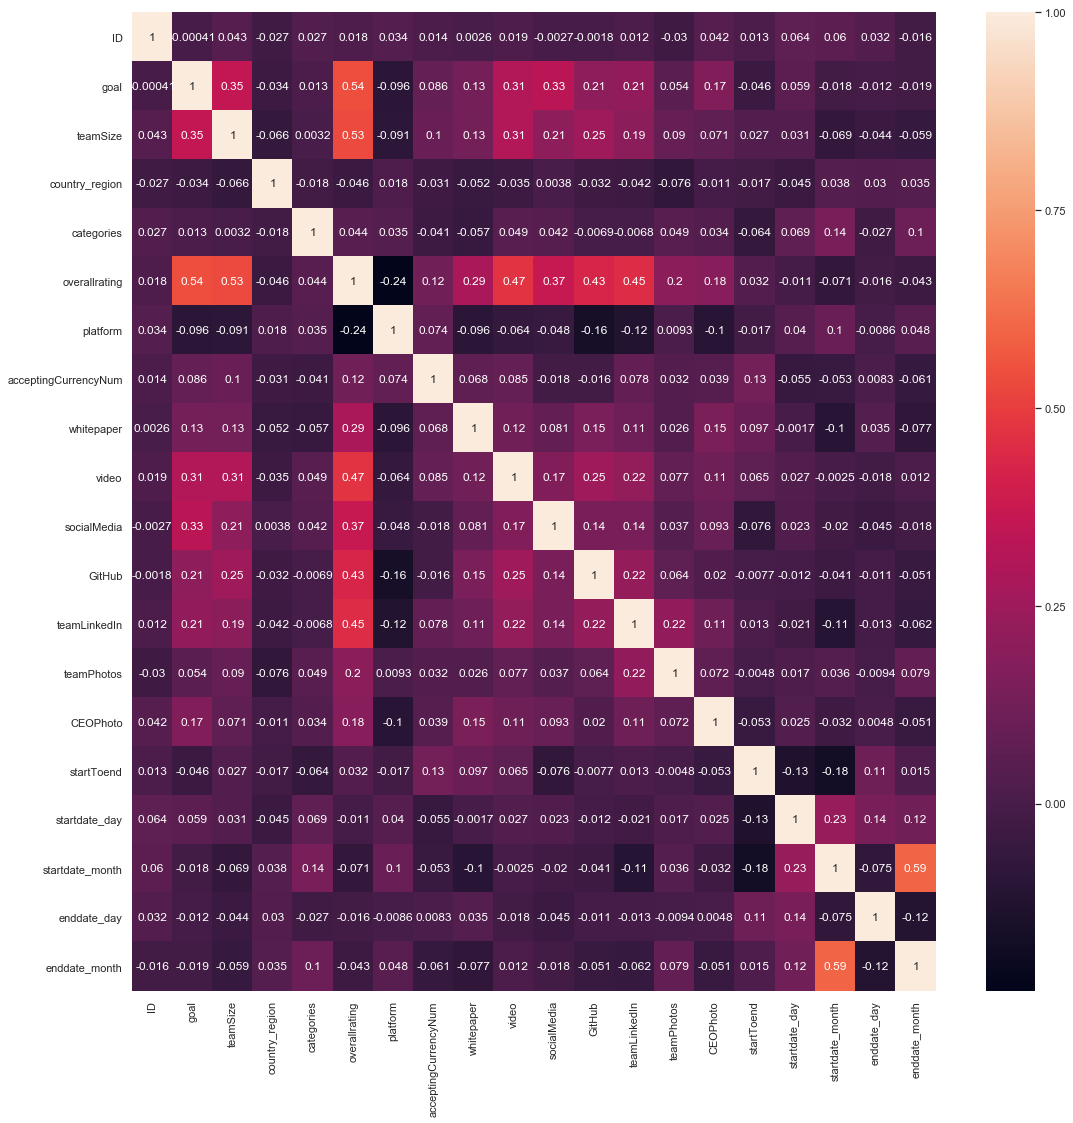

In [74]:
plt.rcParams["figure.figsize"] = (18,18)
sns.heatmap(final_data.corr(), annot = True)
plt.show()

In [58]:
X = final_data.loc[ : , final_data.columns != 'goal']
Y = final_data['goal']

In [59]:
feature_names = X.columns
for feature_name in feature_names:
    X[feature_name] = X[feature_name] / X[feature_name].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)
rfe = rfe.fit(X, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
RFE_columns = X.columns[rfe.support_]
RFE_columns

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [61]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
predictions = logisticRegr.predict(x_test)

In [63]:
score = logisticRegr.score(x_test, y_test)
score

0.7214611872146118

In [64]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.742 (0.034)


In [65]:
confusion_matrix(y_test, predictions)

array([[74, 29],
       [32, 84]], dtype=int64)

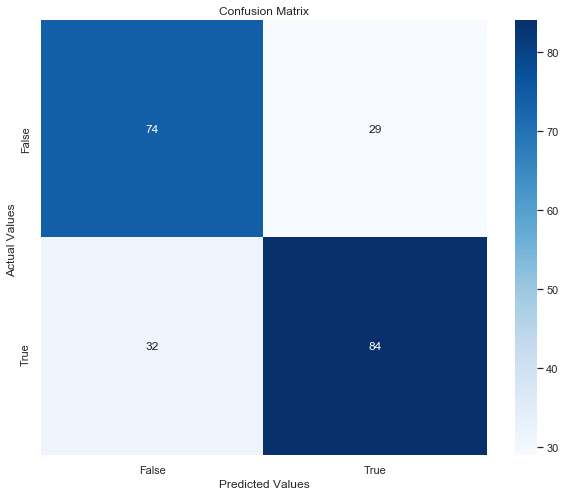

In [66]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [67]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.654 (0.054)


In [68]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.692 (0.046)


In [69]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel='rbf')
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.733 (0.040)


In [75]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.754 (0.052)


In [71]:
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [72]:
confusion_matrix(y_test, predictions)

array([[72, 31],
       [28, 88]], dtype=int64)

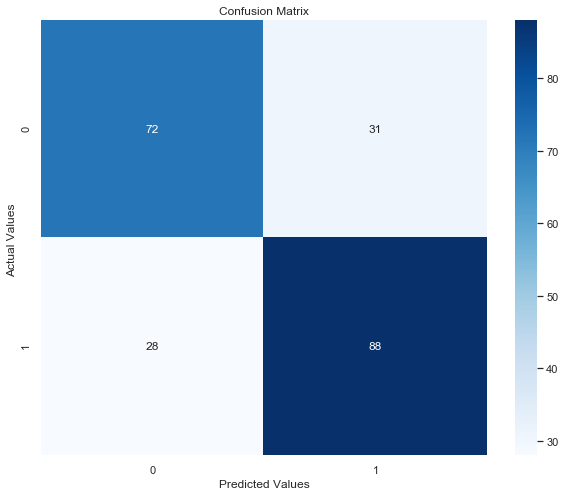

In [73]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

# Ramdomforest Model tuning

In [76]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [78]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [80]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
final_model = rf_random.best_estimator_
scores = cross_val_score(final_model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.764 (0.048)


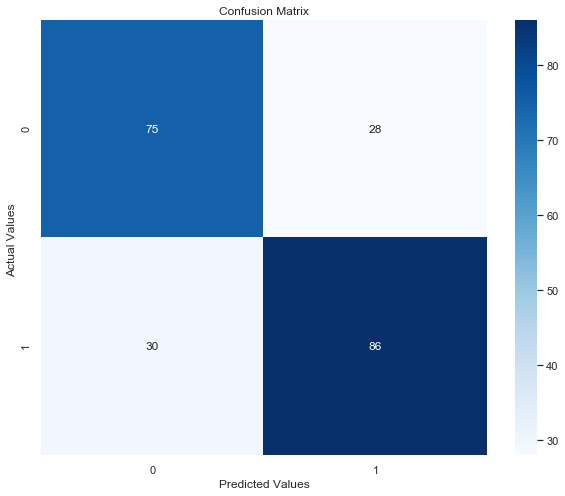

In [83]:
final_model.fit(x_train,y_train)
predictions = final_model.predict(x_test)
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [84]:
confusion_matrix(y_test, predictions)

array([[75, 28],
       [30, 86]], dtype=int64)

In [100]:
predict_proba = pd.DataFrame(final_model.predict_proba(x_test))
preditions_df = pd.DataFrame(predictions)

In [101]:
y_test1 = y_test.reset_index(inplace = True, drop = True)

In [102]:
auc_df = pd.concat([y_test,preditions_df,predict_proba],axis = 1)
auc_df.columns = ['actual', 'predicted', 'goal_N', 'goal_Y']

In [103]:
auc_score = metrics.roc_auc_score( auc_df.actual, auc_df.goal_Y )
round( float( auc_score ), 2 )

0.8

Text(0.5, 0, 'False Positive Rate')

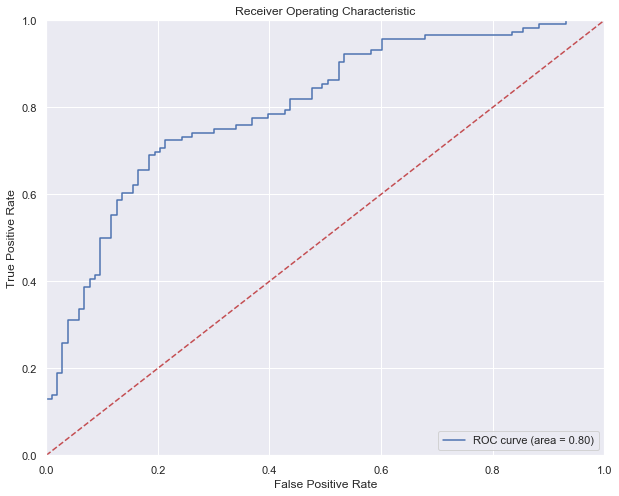

In [99]:
fpr, tpr, threshold = metrics.roc_curve(y_test,auc_df.goal_Y,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')